In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
data = pd.read_csv("cleaned_laptops3.csv")
print(data.head(5))


    brand                       model  price  discount  ram_DDR4  ram_DDR5  \
0    Dell     VOSTRO CORE I3 11TH GEN  37990      35.0       8.0       0.0   
1      Hp  14S INTEL CORE I3 11TH GEN  35490      24.0       8.0       0.0   
2  Lenovo     V15 G2 CORE I3 11TH GEN  33999      43.0       8.0       0.0   
3      Hp  15S INTEL CORE I3 12TH GEN  45490      19.0       8.0       0.0   
4    Asus                 VIVOBOOK 15  33990      26.0       8.0       0.0   

   ram_lpddr4x   bit windows  ssd(GB)  hdd(GB)  display  warranty_years  \
0          0.0   0.0   other      0.0      0.0     15.0             1.0   
1          0.0  64.0    11.0    256.0      0.0     14.0             1.0   
2          0.0  64.0    11.0    512.0      0.0     15.6             1.0   
3          0.0  64.0    11.0    512.0      0.0     15.6             1.0   
4          0.0  64.0    11.0    512.0      0.0     15.6             1.0   

   warranty_accidental  processor_amd_quad  processor_amd_octa  \
0             

In [20]:
print(data.columns)

Index(['brand', 'model', 'price', 'discount', 'ram_DDR4', 'ram_DDR5',
       'ram_lpddr4x', 'bit', 'windows', 'ssd(GB)', 'hdd(GB)', 'display',
       'warranty_years', 'warranty_accidental', 'processor_amd_quad',
       'processor_amd_octa', 'processor_amd_hexa', 'processor_intel'],
      dtype='object')


In [21]:
data = data.drop(["brand","model"], axis=1)
print(data.head(5))

   price  discount  ram_DDR4  ram_DDR5  ram_lpddr4x   bit windows  ssd(GB)  \
0  37990      35.0       8.0       0.0          0.0   0.0   other      0.0   
1  35490      24.0       8.0       0.0          0.0  64.0    11.0    256.0   
2  33999      43.0       8.0       0.0          0.0  64.0    11.0    512.0   
3  45490      19.0       8.0       0.0          0.0  64.0    11.0    512.0   
4  33990      26.0       8.0       0.0          0.0  64.0    11.0    512.0   

   hdd(GB)  display  warranty_years  warranty_accidental  processor_amd_quad  \
0      0.0     15.0             1.0                    0                   0   
1      0.0     14.0             1.0                    0                   0   
2      0.0     15.6             1.0                    1                   0   
3      0.0     15.6             1.0                    0                   0   
4      0.0     15.6             1.0                    0                   0   

   processor_amd_octa  processor_amd_hexa  process

In [22]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data = data[numeric_cols]

In [23]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [24]:
print(data.isna().sum())

price                  0
discount               0
ram_DDR4               0
ram_DDR5               0
ram_lpddr4x            0
bit                    0
ssd(GB)                0
hdd(GB)                0
display                0
warranty_years         0
warranty_accidental    0
processor_amd_quad     0
processor_amd_octa     0
processor_amd_hexa     0
processor_intel        0
dtype: int64


In [31]:
pca = PCA(n_components=4)
pca4 = pca.fit_transform(scaled)

original_var = np.var(scaled , axis=0).sum()
pca4_var = np.var(pca4 , axis=0).sum()
variance4 = (pca4_var / original_var)*100
print(variance4)

47.474591611776106


im gonna try it out once with pca 4 and again with pca 11

In [32]:
pca = PCA(n_components=11)
pca11 = pca.fit_transform(scaled)

original_var = np.var(scaled , axis=0).sum()
pca11_var = np.var(pca11 , axis=0).sum()
variance11 = (pca11_var / original_var)*100
print(variance11)


90.74625981970115


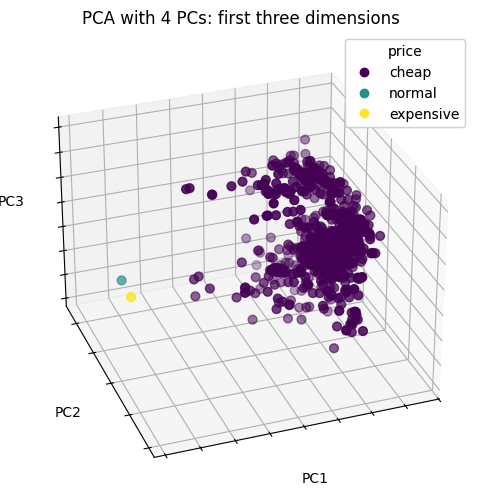

In [34]:
price_bins = pd.cut(data['price'], bins=3, labels=['cheap', 'normal', 'expensive'])
price_codes = price_bins.cat.codes 


pca4 = PCA(n_components=4)
X_reduced4 = pca4.fit_transform(scaled)[:, :3]

fig4 = plt.figure(1, figsize=(8, 6))
ax4 = fig4.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter4 = ax4.scatter(
    X_reduced4[:, 0], X_reduced4[:, 1], X_reduced4[:, 2],
    c=price_codes, s=40 
)

ax4.set(title="PCA with 4 PCs: first three dimensions", xlabel="PC1", ylabel="PC2", zlabel="PC3")
ax4.xaxis.set_ticklabels([]); ax4.yaxis.set_ticklabels([]); ax4.zaxis.set_ticklabels([])


legend4 = ax4.legend(
    scatter4.legend_elements()[0],
    ['cheap', 'normal', 'expensive'],
    loc="upper right", title="price"
)
ax4.add_artist(legend4)

plt.show()

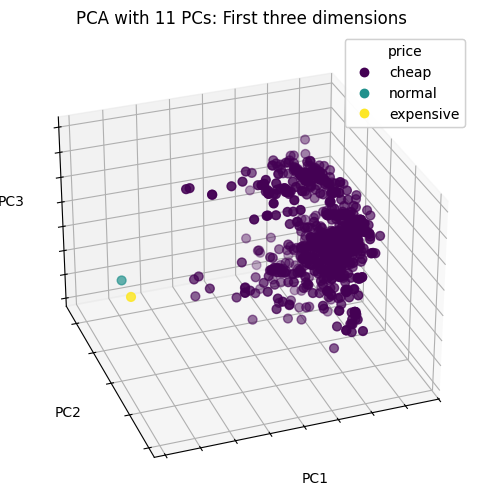

In [35]:
pca11 = PCA(n_components=11)
X_reduced11 = pca11.fit_transform(scaled)[:, :3]

fig11 = plt.figure(2, figsize=(8, 6))
ax11 = fig11.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter11 = ax11.scatter(
    X_reduced11[:, 0], X_reduced11[:, 1], X_reduced11[:, 2],
    c=price_codes, s=40 
)

ax11.set(title="PCA with 11 PCs: First three dimensions", xlabel="PC1", ylabel="PC2", zlabel="PC3")
ax11.xaxis.set_ticklabels([]); ax11.yaxis.set_ticklabels([]); ax11.zaxis.set_ticklabels([])


legend11 = ax11.legend(
    scatter11.legend_elements()[0],
    ['cheap', 'normal', 'expensive'],
    loc="upper right", title="price"
)
ax11.add_artist(legend11)

plt.show()